## Solar Power Prediction Using Linear Regression

## WEEK 3: Building Machine Learning Model using Linear Regression to predict Solar power generation

In [19]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [20]:
# importing the dataset

df = pd.read_csv("dataset.csv")

In [21]:
# viewing the dataset

df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

## Exploratory Data Analysis

In [22]:
print(df.shape)

(4213, 21)


In [23]:
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [25]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

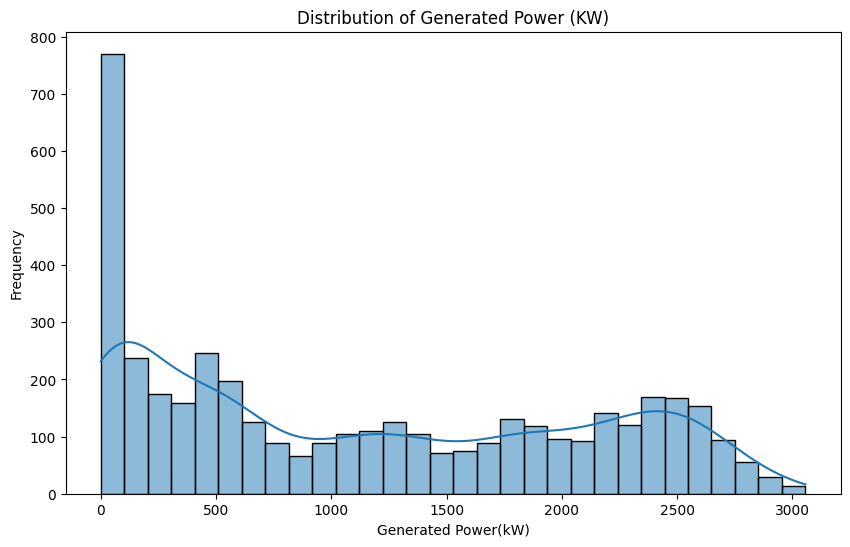

In [26]:
plt.figure(figsize = (10,6))
sns.histplot(df['generated_power_kw'], bins = 30, kde = True)
plt.title('Distribution of Generated Power (KW)')
plt.xlabel('Generated Power(kW)')
plt.ylabel('Frequency')
plt.show()

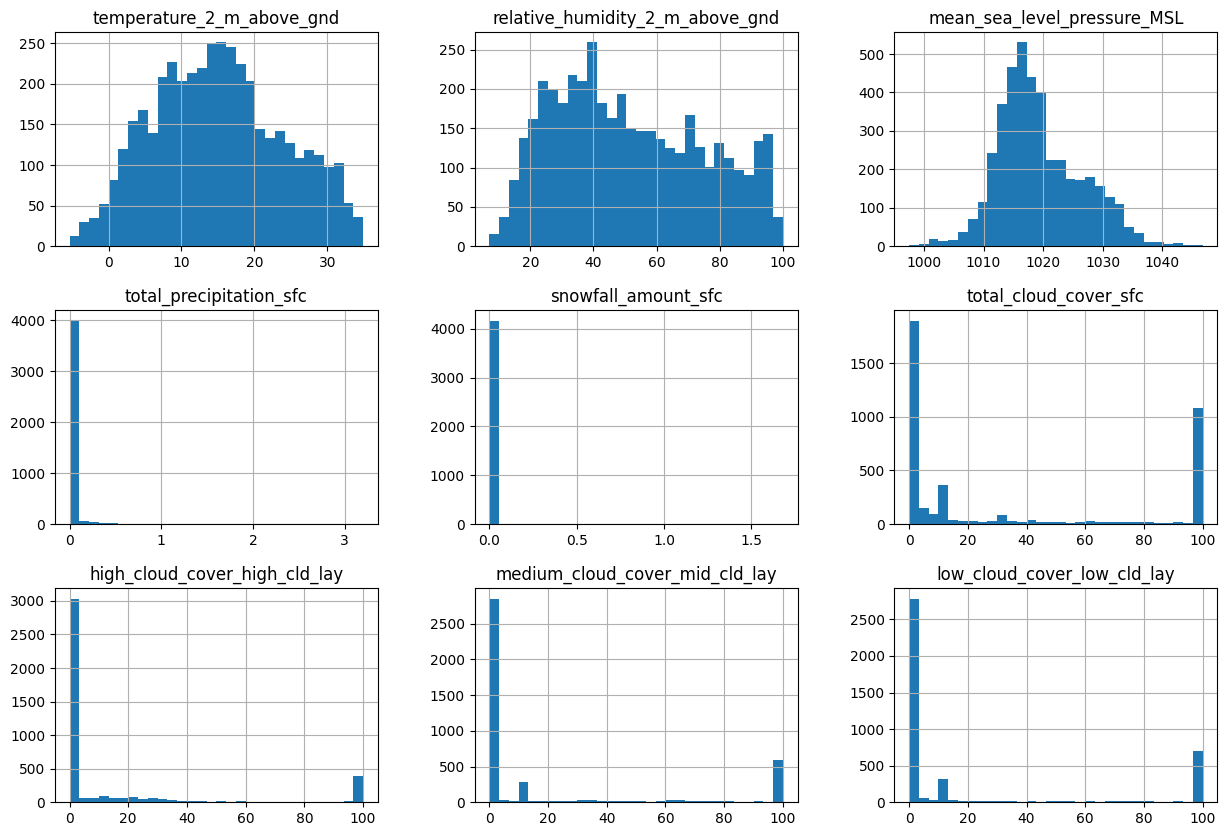

In [27]:
df[df.columns[:9]].hist(bins = 30, figsize = (15, 10))
plt.show()

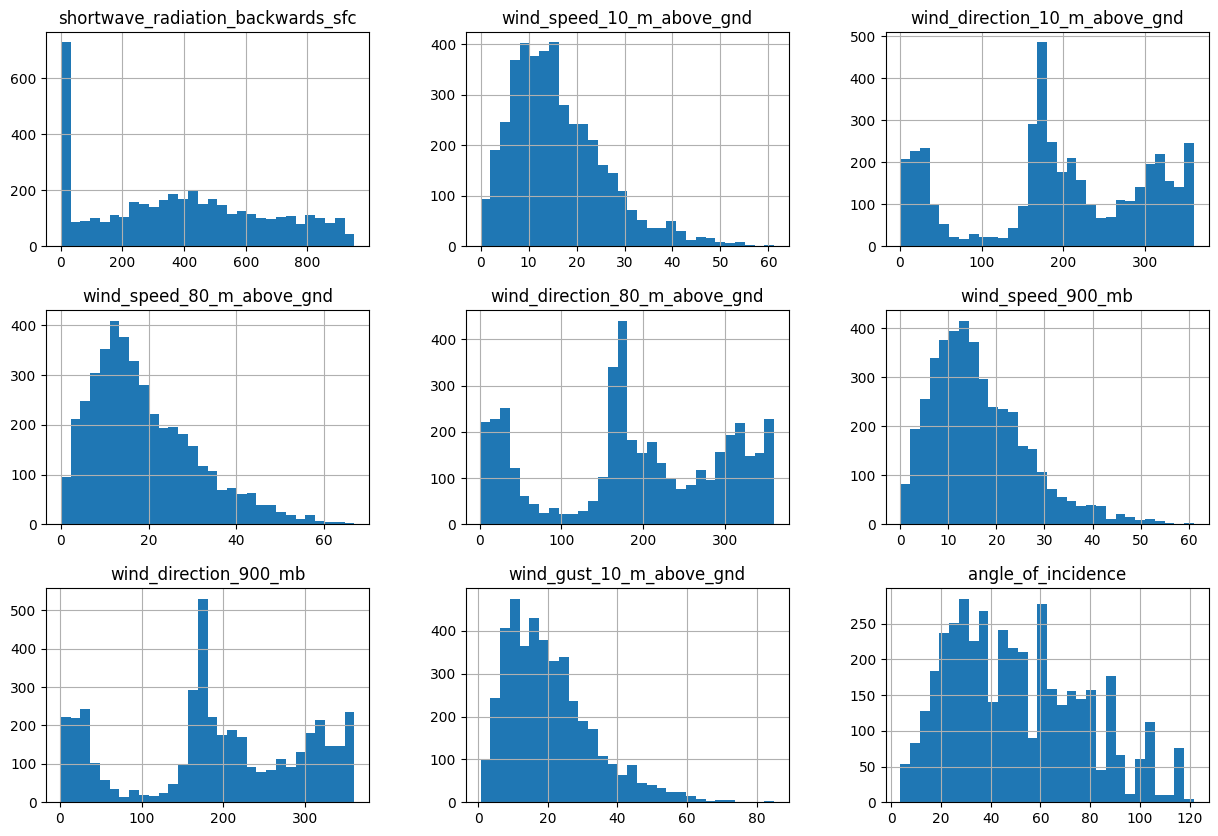

In [28]:
df[df.columns[9:18]].hist(bins = 30, figsize = (15, 10))
plt.show()

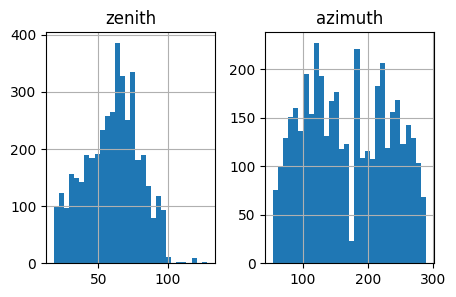

In [29]:
df[df.columns[18:20]].hist(bins = 30, figsize = (5, 3))
plt.show()

In [30]:
## some variables are looking sparse so lets check for sparsity

sparse_info = (df == 0).sum() / len(df)
print(sparse_info.sort_values(ascending=False))

snowfall_amount_sfc                  0.988844
total_precipitation_sfc              0.927130
high_cloud_cover_high_cld_lay        0.690719
medium_cloud_cover_mid_cld_lay       0.666271
low_cloud_cover_low_cld_lay          0.636364
total_cloud_cover_sfc                0.395917
shortwave_radiation_backwards_sfc    0.126038
wind_speed_10_m_above_gnd            0.000712
wind_speed_900_mb                    0.000475
temperature_2_m_above_gnd            0.000237
wind_speed_80_m_above_gnd            0.000237
relative_humidity_2_m_above_gnd      0.000000
mean_sea_level_pressure_MSL          0.000000
wind_direction_10_m_above_gnd        0.000000
wind_direction_80_m_above_gnd        0.000000
wind_direction_900_mb                0.000000
wind_gust_10_m_above_gnd             0.000000
angle_of_incidence                   0.000000
zenith                               0.000000
azimuth                              0.000000
generated_power_kw                   0.000000
dtype: float64


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_star = df.drop(columns=['generated_power_kw', 'total_precipitation_sfc', 'snowfall_amount_sfc'])
y_star = df['generated_power_kw']

model = LinearRegression()
baseline_score = cross_val_score(model, X_star, y_star, cv=5).mean()

X_with_precip = df.drop(columns=['generated_power_kw', 'snowfall_amount_sfc'])
score_with_precip = cross_val_score(model, X_with_precip, y_star, cv=5).mean()

print(f"Without precip: {baseline_score:.4f}, With precip: {score_with_precip:.4f}")


Without precip: 0.6818, With precip: 0.6817


In [32]:
# we can safely remove the sparse columns i.e total_precipitation_sfc and 'snowfall_amount_sfc' for our linear regression;

df = df.drop(columns=['snowfall_amount_sfc', 'total_precipitation_sfc'])
df.shape

(4213, 19)

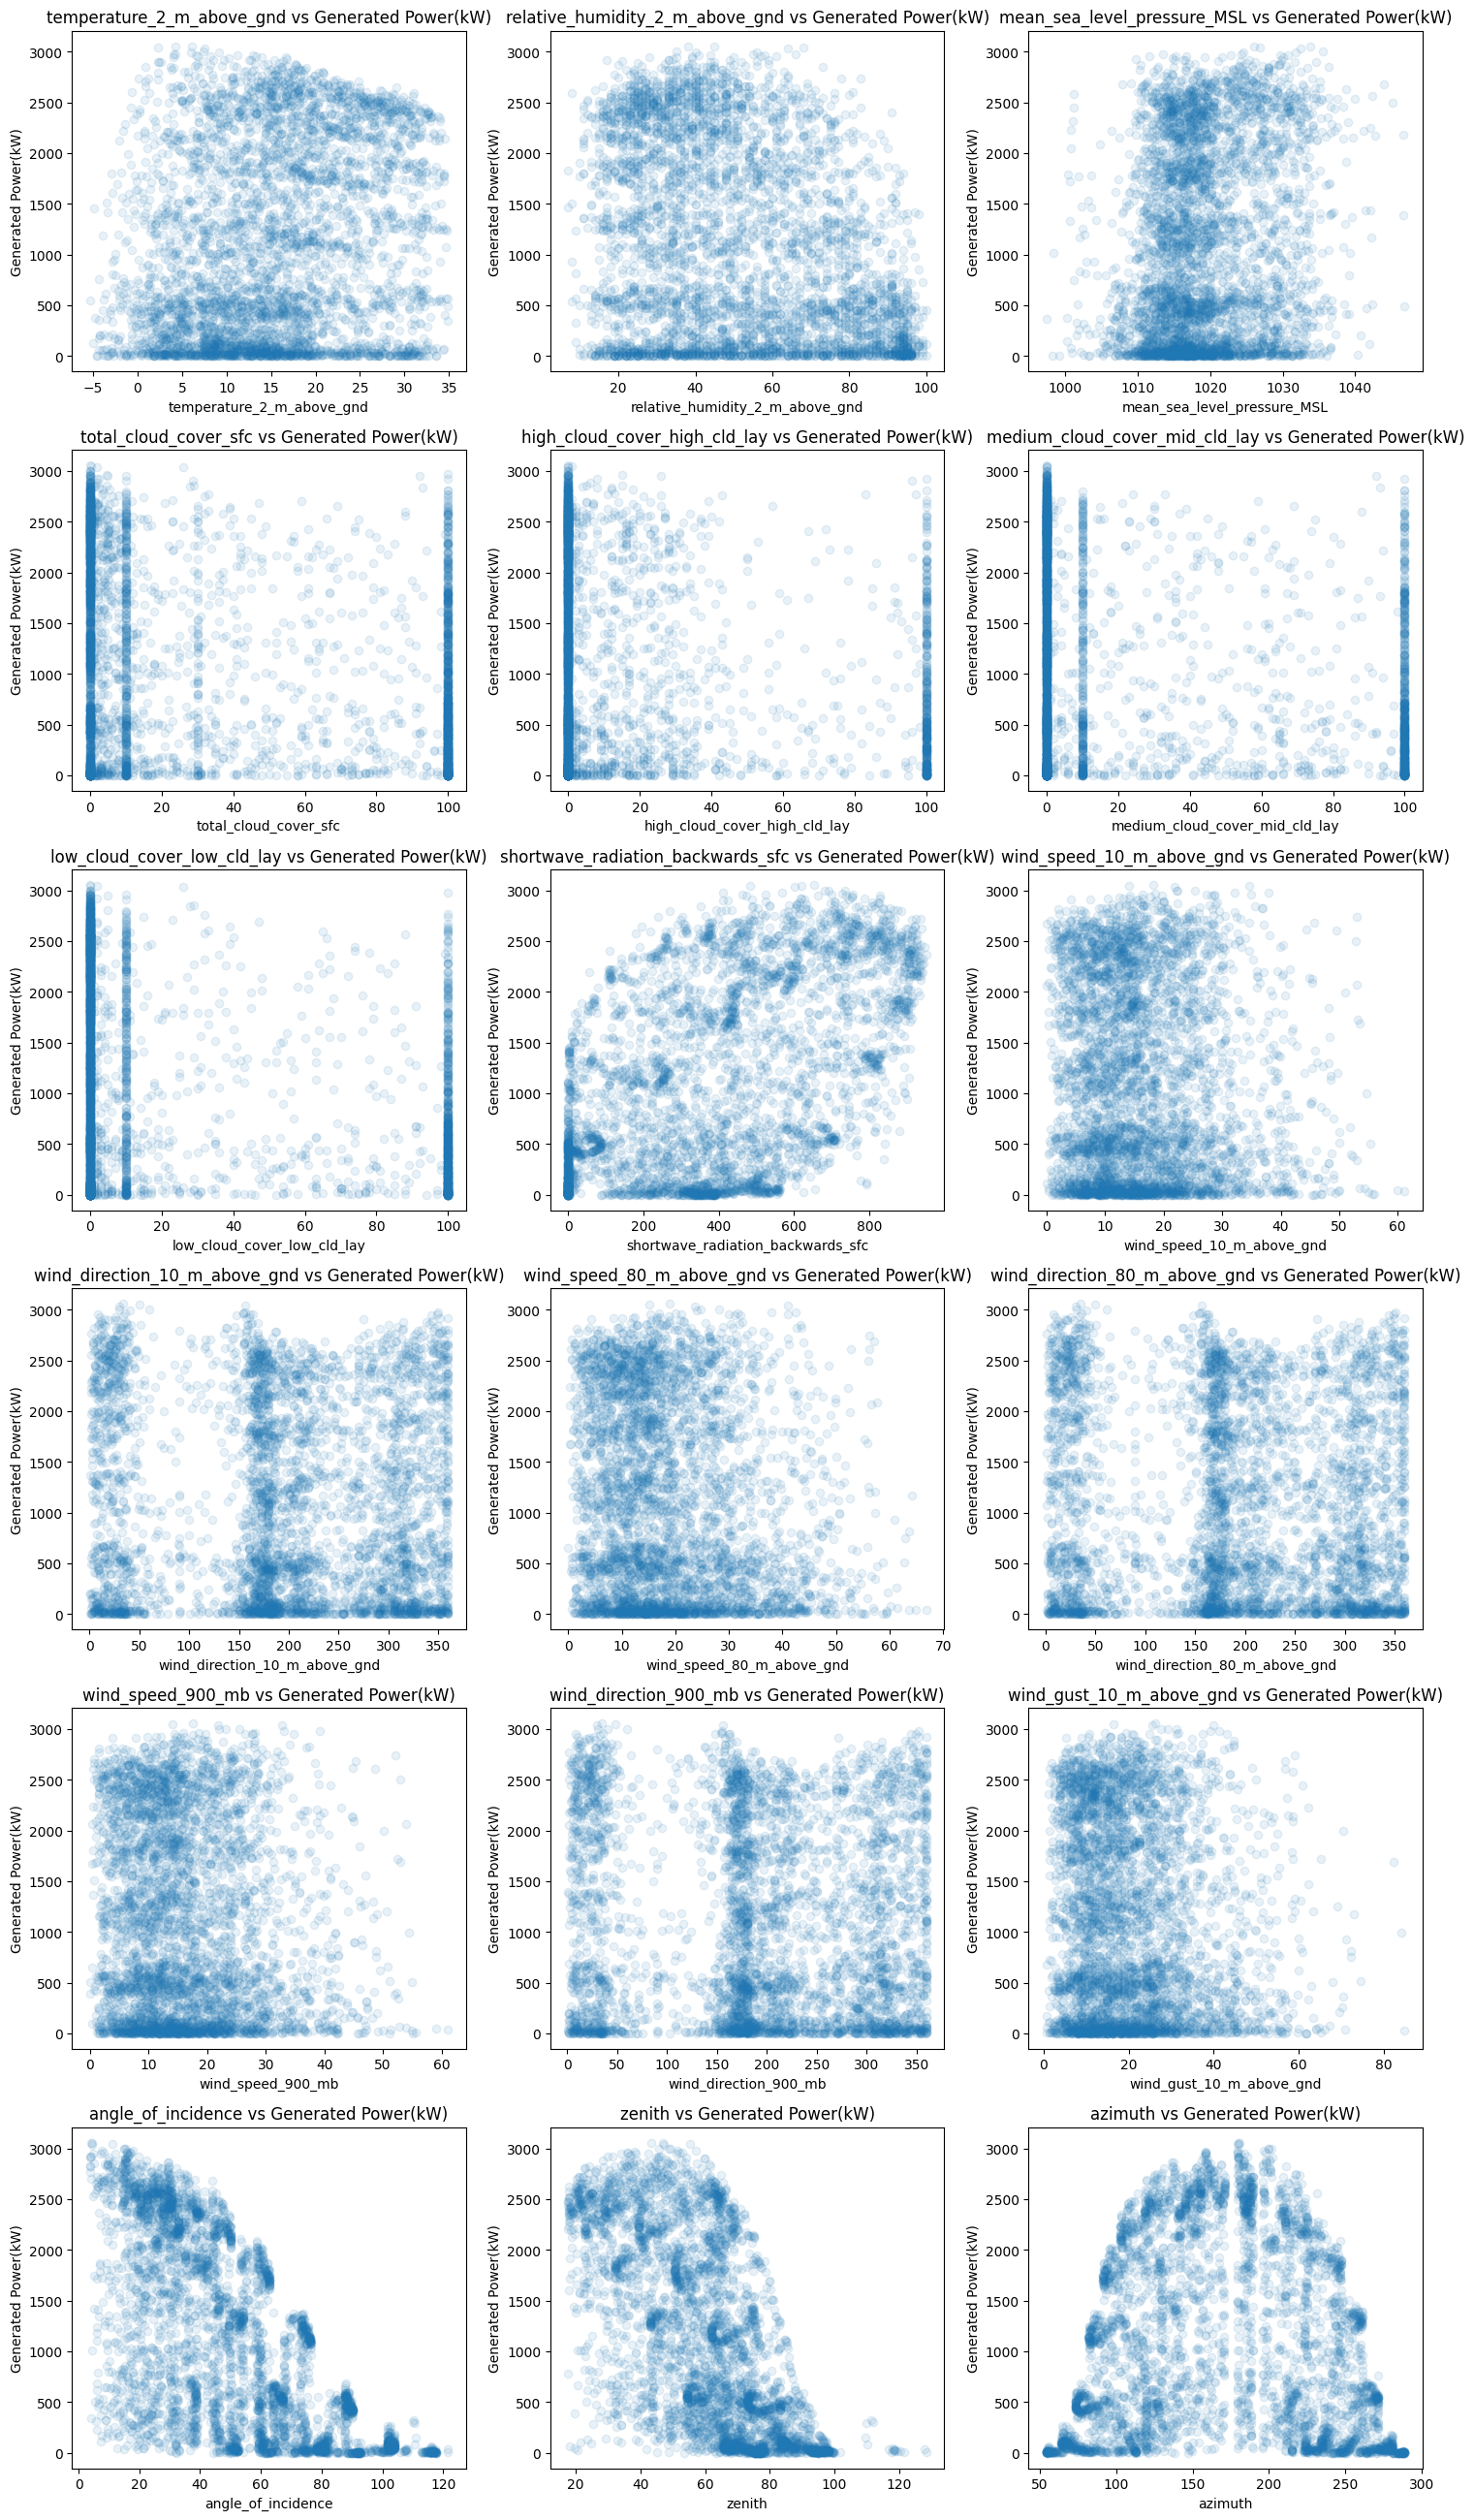

In [33]:
# Bivariate analysis
# Scatter plot with the target feature

plt.figure(figsize = (15, 30))
for i, column in enumerate(df.columns[:(df.shape[1]-1)]):
    plt.subplot(7, 3, i+1)
    plt.scatter(df[column], df['generated_power_kw'], alpha=0.1)
    plt.title(f'{column} vs Generated Power(kW)')
    plt.xlabel(column)
    plt.ylabel('Generated Power(kW)')
plt.tight_layout()
plt.show()

In [34]:
import numpy as np

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features:", to_drop)

Highly correlated features: ['wind_speed_80_m_above_gnd', 'wind_speed_900_mb', 'wind_direction_900_mb']


In [35]:
### i am going to avoid pca and manually pick any feature out of correlated triplet i am going to keep wind_speed_80m_above_ground

df = df.drop(columns=['wind_speed_900_mb', 'wind_direction_900_mb'])
df.shape

(4213, 17)

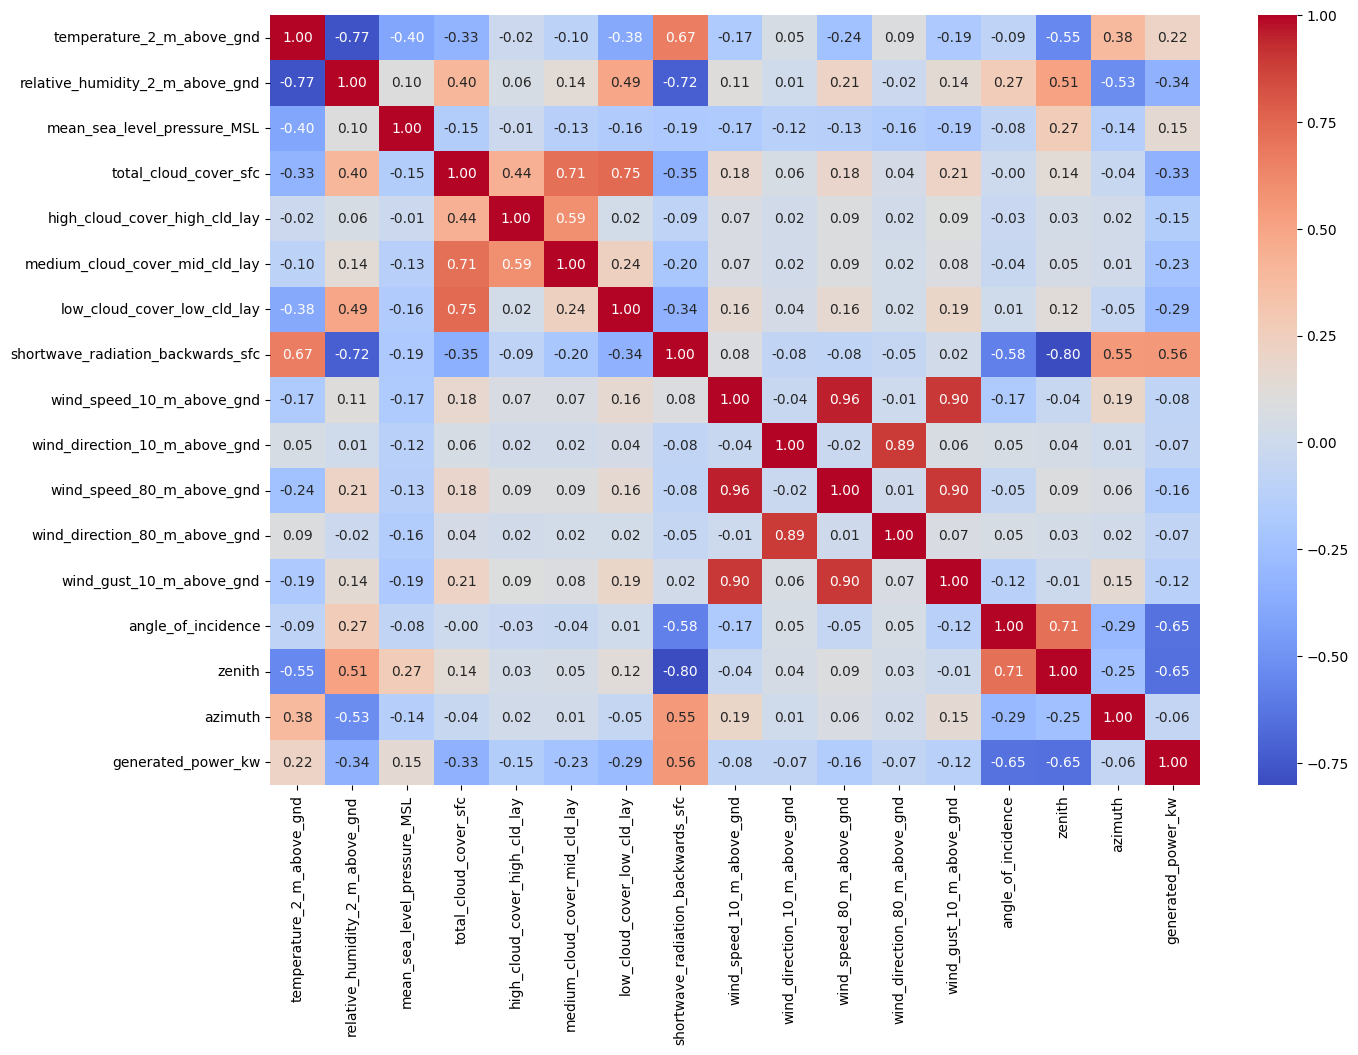

In [36]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.plot();

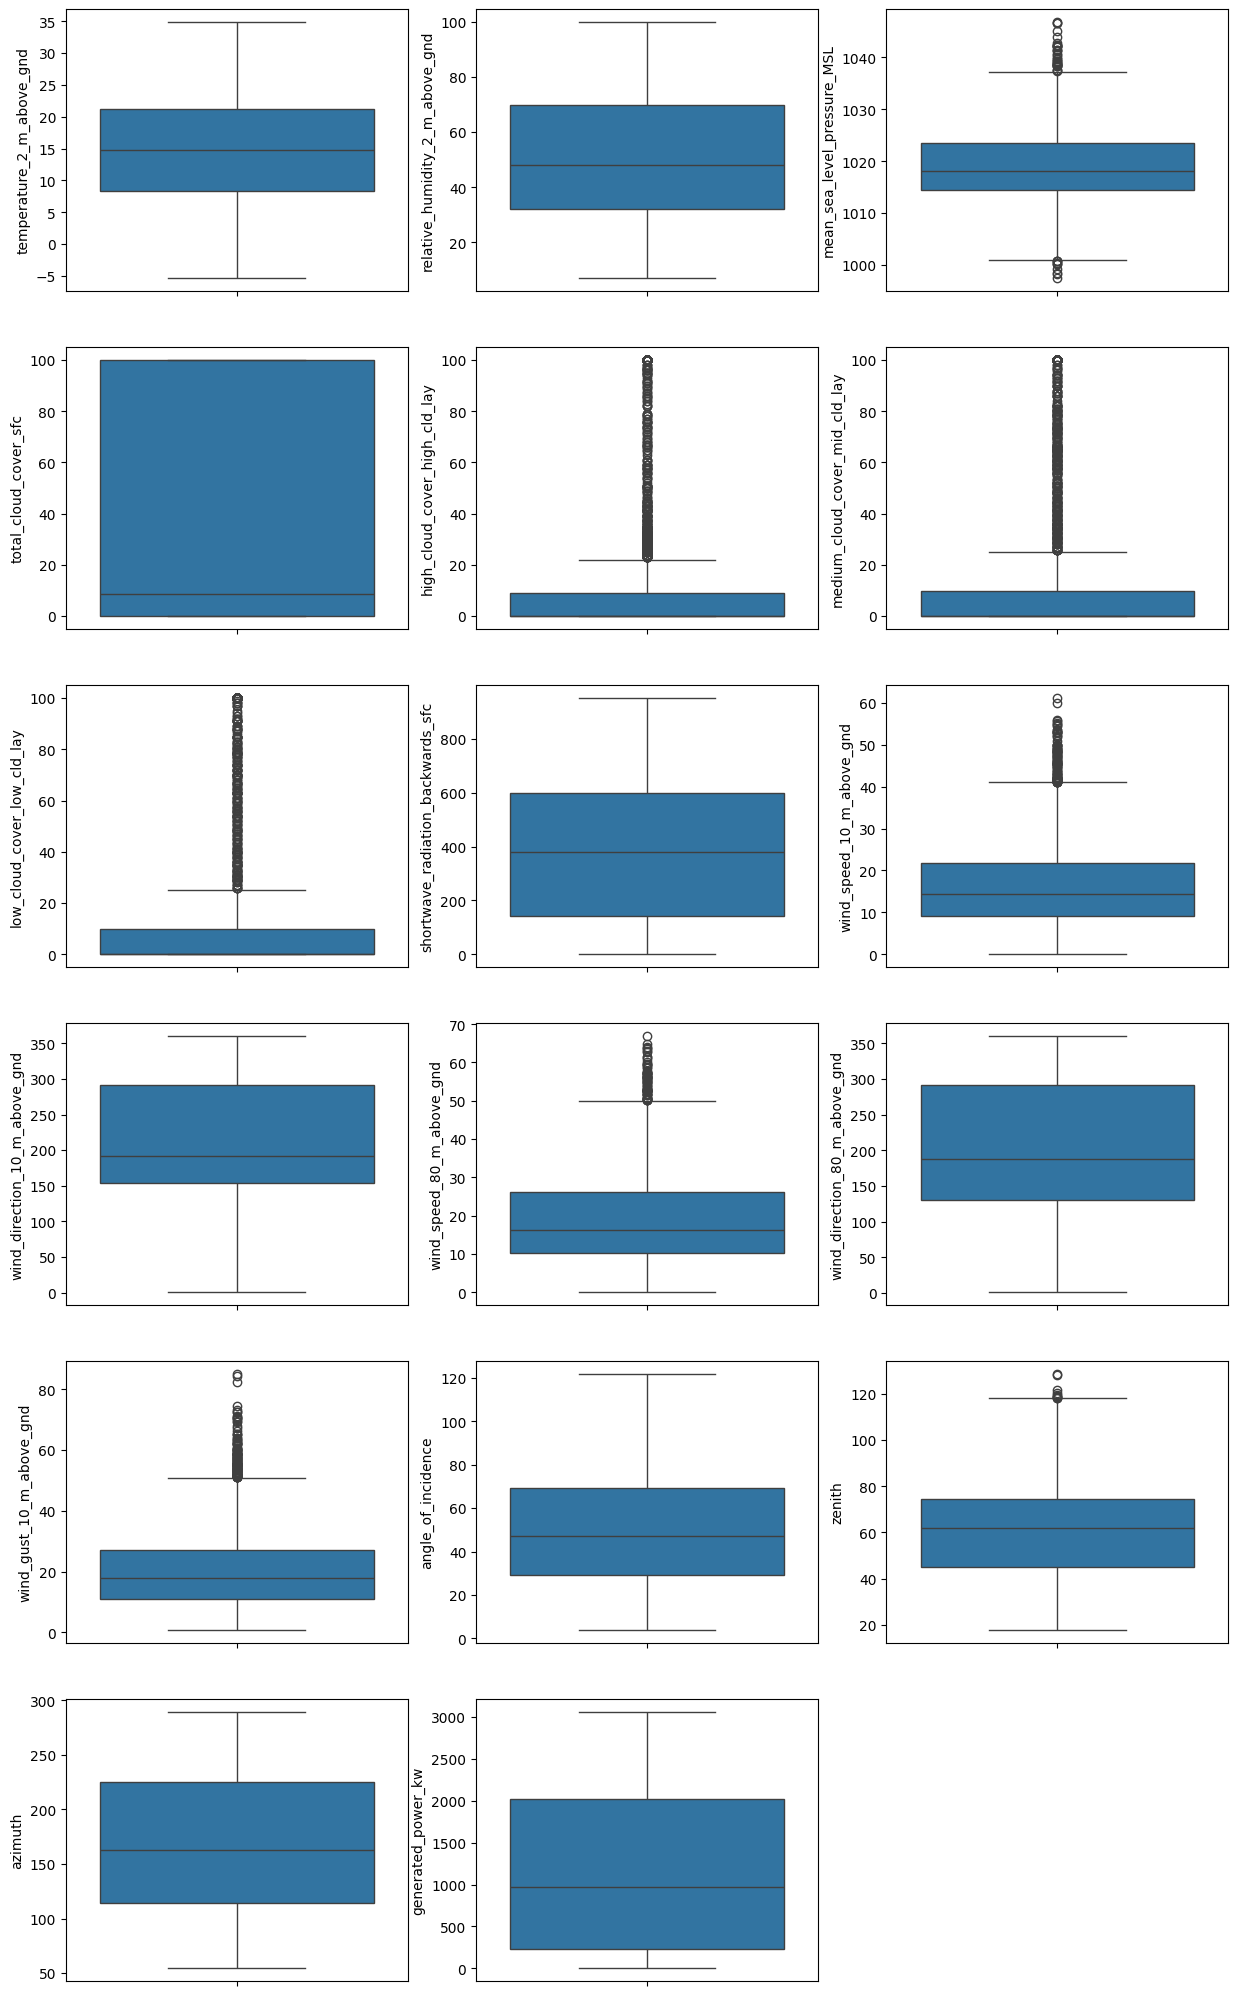

In [37]:
# outliers
# outliers are beyond inter-quartile range(q1: 25%, q2: 50%, q3: 75%)(q1-IQR to q3 + IQR)

plt.figure(figsize= (15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

## Week 3: Building machine learning model to predict the solar power generation

In [38]:
X = df.drop('generated_power_kw', axis = 1)
y = df['generated_power_kw']

In [39]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [40]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#train the model 
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
#Evaluate the model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_train = r2_score(y_test, y_pred)
print(f"Mean absolute error on test set: {round(mae, 2)}")
print(f"r^2 score on test set: {round(r2_train, 2)}")

Mean absolute error on test set: 389.77
r^2 score on test set: 0.72


In [43]:
#Evaluate the model on the training set
y_pred_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean absolute error on train set: {round(mae_train, 2)}")
print(f"r^2 score on train set: {round(r2_train, 2)}")

Mean absolute error on train set: 393.16
r^2 score on train set: 0.7


In [44]:
#mae on test set and mae on train set is almost same hence model has performed well

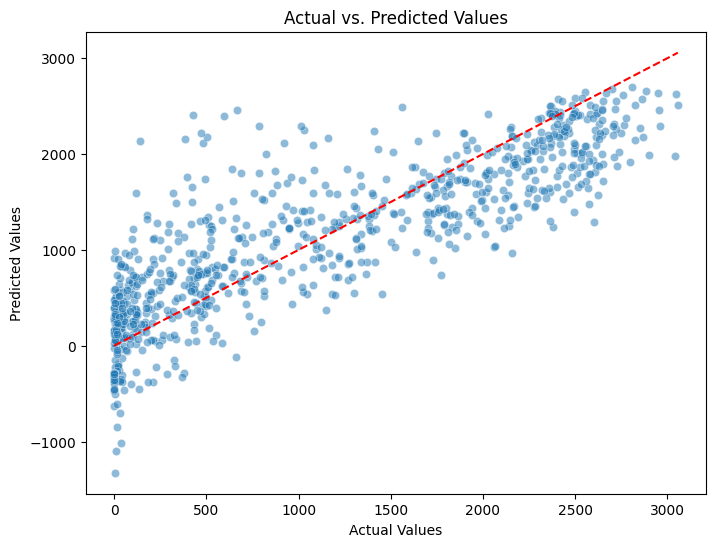

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()